Load HyperParameters

In [1]:
from neat_src import loadHyp, updateHyp
from domain import load_task
from neat_src import DataGatherer, Neat 
from domain.config import games
from domain.task_gym import GymTask

game = games["slimevolley"]
task = GymTask(game)

hyp_default = 'p/default_neat.json'
hyp_adjust = "p/volley.json"
fileName = "volley"

hyp = loadHyp(pFileName=hyp_default, load_task=load_task)
updateHyp(hyp,load_task,hyp_adjust)

hyp["cap_layer"] = 3
# neat = Neat(hyp)

	*** Running with hyperparameters:  p/volley.json 	***


#### Convert Policy model to Ind in Neat 

In [2]:
import json
import numpy as np
import gym, os
import slimevolleygym
import slimevolleygym.mlp as mlp
from slimevolleygym.mlp import games as games
from slimevolleygym.mlp import Model
from slimevolleygym import multiagent_rollout as rollout


# Settings
random_seed = 612
population_size = 128
total_tournaments = 500000
save_freq = 1000


# Log results
logdir = "ga_rotation_je"
if not os.path.exists(logdir):
  os.makedirs(logdir)

def mutate(param, param_count):
  return param + np.random.normal(size=param_count) * 0.1

curr_policy = Model(games['slimevolleylite'])
prev_policy = Model(games['slimevolleylite'])

/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_20898/869475039.py:26: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  curr_policy = Model(games['slimevolleylite'])
/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_20898/869475039.py:27: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  prev_policy = Model(games['slimevolleylite'])


# of Connections in ANN:  47


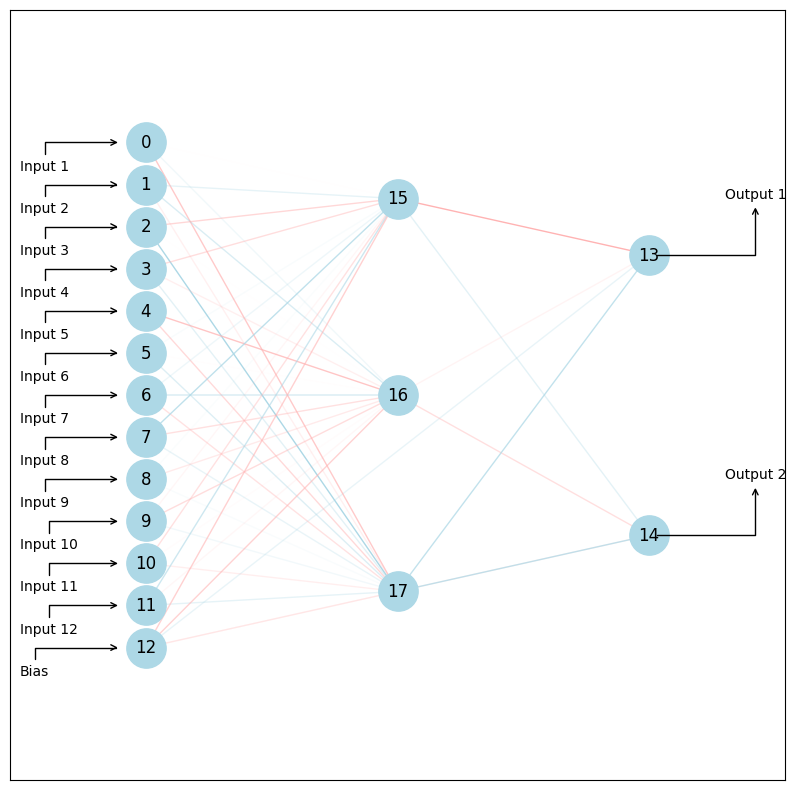

In [3]:
# Slime Environment Specific model -> Ind convertion function 
from neat_src import Ind, initIndiv
from vis.viewInd import viewInd 

temp_shapes = [(12, 3), (3, 2)] # debug getlayer functional variable 

indiv = Ind.from_shapes(temp_shapes)
indiv.express()

# visualize individual network 
fig, ax = viewInd(indiv, "slimevolley") # this is in-correct, edge is not correctly assigned ...

In [5]:
# Indiv --> Policy Model 
game = games['slimevolleylite']
load_policy = Model.from_indiv(indiv, game)

In [20]:
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import io

# Convert matplotlib figure to PIL Image
def fig2img(fig):
    # Save figure to a temporary buffer.
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    buf.seek(0)
    return Image.open(buf)


# def animate_mutations(shapes, hyp, generations: int = 200, save_name: str = "network_evolution.gif"):
    
frames = []  # Store frames

prev_indiv = Ind.from_shapes([(12, 3)])
prev_indiv.express()

hyp['prob_addNode'] = 0.5
hyp['prob_addConn'] = 0.3
hyp['cap_layer'] = 4
hyp['stop_topology_mutate_generations'] = 200


matplotlib.use('Agg')  # Use Agg backend for better memory management
gen = 1
# Generate and store frames
for i in range(250):
    
    child, innov = prev_indiv.mutate(hyp, gen=gen)    
    if child is False: 
        print("Failed to express :: Bad mutation")
        # break 
    else:
        fig, ax = viewInd(child, "slimevolley")
        prev_indiv = child 
        gen += 1 
        img = fig2img(fig)
        frames.append(img)
        plt.close(fig)

    
# Save frames as GIF directly using PIL
frames[0].save(
    'network_evolution_mix.gif',
    save_all=True,
    append_images=frames[1:],
    duration=500,  # Duration for each frame in milliseconds
    loop=0        # 0 means loop forever
)

# of Connections in ANN:  41
# of Connections in ANN:  43
# of Connections in ANN:  43
# of Connections in ANN:  45
# of Connections in ANN:  46
# of Connections in ANN:  48
# of Connections in ANN:  50
# of Connections in ANN:  53
# of Connections in ANN:  55
# of Connections in ANN:  58
# of Connections in ANN:  58
# of Connections in ANN:  60
# of Connections in ANN:  60
# of Connections in ANN:  61
# of Connections in ANN:  62
# of Connections in ANN:  65
# of Connections in ANN:  65
# of Connections in ANN:  67
# of Connections in ANN:  67
# of Connections in ANN:  68
# of Connections in ANN:  69
# of Connections in ANN:  71
# of Connections in ANN:  72
# of Connections in ANN:  74
# of Connections in ANN:  75
# of Connections in ANN:  75
# of Connections in ANN:  78
# of Connections in ANN:  80
Failed to express :: Bad mutation
# of Connections in ANN:  80
# of Connections in ANN:  81
# of Connections in ANN:  83
# of Connections in ANN:  84
# of Connections in ANN:  84
# of Conn

KeyboardInterrupt: 

In [26]:
# ok, so crossover also works .... | but I'd like to stick to the basic idea (replacing mutation gadgets in the tournament based GA environment)

hyp['prob_addNode'] = 0.5
hyp['prob_addConn'] = 0.3
hyp['cap_layer'] = 4
hyp['stop_topology_mutate_generations'] = 200
hyp['prob_mutConn'] = 1.0 
hyp['ann_mutSigma'] = 0.1 



In [28]:
indiv